In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_tr = x_train[y_train[:, 0] == 5]
y_tr = y_train[y_train[:, 0] == 5]
x_te = x_test[y_test[:, 0] == 5]
y_te = y_test[y_test[:, 0] == 5]

with tf.device('/CPU:0'):
    x_tr = tf.image.resize(x_tr, (224, 224))
    x_te = tf.image.resize(x_te, (224, 224))

x_tr = x_tr / 255.0
x_te = x_te / 255.0

y_tr = to_categorical(y_tr, 10)
y_te = to_categorical(y_te, 10)

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1
)

data_generator.fit(x_tr)
train_generator = data_generator.flow(x_tr, y_tr, batch_size=8)
batch_size = 8

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    steps_per_epoch=len(x_tr) // batch_size, 
                    epochs=5, 
                    validation_data=(x_te, y_te), 
                    verbose=1)

test_loss, test_acc = model.evaluate(x_te, y_te, verbose=2)
print(f'Test accuracy: {test_acc*100:.2f}%')

import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

def predict_mazu(model, image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return class_index, prediction[0][class_index]

image_path = r"C:\Users\aasri\Downloads\mark_zuckerberg.jpg"
class_index, confidence = predict_mazu(model, image_path)


Epoch 1/5
625/625 [==============================] - 1614s 3s/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
625/625 [==============================] - 1226s 2s/step - loss: 7.1526e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
625/625 [==============================] - 755s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 1518s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 696s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
32/32 - 57s - loss: 0.0000e+00 - accuracy: 1.0000 - 57s/epoch - 2s/step
Test accuracy: 100.00%
1/1 [==============================] - 1s 1s/step


In [6]:
if class_index == 5:
    print("The model predicts that he is Mark Zuckerberg.")
else:
    print("The model predicts that he is not Mark Zuckerberg.")

The model predicts that he is Mark Zuckerberg.


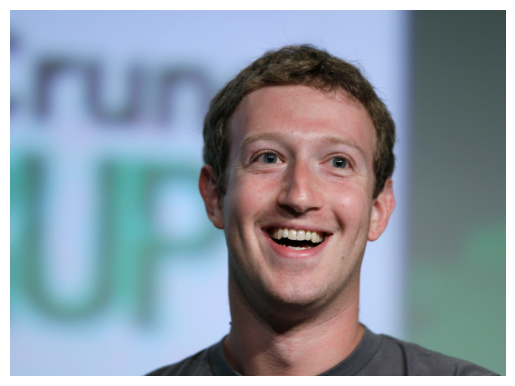

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

image_path = r"C:\Users\aasri\Downloads\mark_zuckerberg.jpg"
show_image(image_path)